# Import python libaraies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime

# Load first dataset

In [ ]:
covid_df = pd.read_csv("/content/country_wise_latest.csv")
covid_df.head(10)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
5,Antigua and Barbuda,86,3,65,18,4,0,5,3.49,75.58,4.62,76,10,13.16,Americas
6,Argentina,167416,3059,72575,91782,4890,120,2057,1.83,43.35,4.21,130774,36642,28.02,Americas
7,Armenia,37390,711,26665,10014,73,6,187,1.90,71.32,2.67,34981,2409,6.89,Europe
8,Australia,15303,167,9311,5825,368,6,137,1.09,60.84,1.79,12428,2875,23.13,Western Pacific
9,Austria,20558,713,18246,1599,86,1,37,3.47,88.75,3.91,19743,815,4.13,Europe


# Get information for the dataset

In [ ]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [ ]:
covid_df.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


# Load second dataset

In [ ]:
day_df = pd.read_csv("/content/day_wise.csv")
day_df.head(10)

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13
5,2020-01-27,2927,82,61,2784,809,26,9,2.80,2.08,134.43,16
6,2020-01-28,5578,131,107,5340,2651,49,46,2.35,1.92,122.43,16
7,2020-01-29,6166,133,125,5908,588,2,18,2.16,2.03,106.40,18
8,2020-01-30,8234,171,141,7922,2068,38,16,2.08,1.71,121.28,20
9,2020-01-31,9927,213,219,9495,1693,42,78,2.15,2.21,97.26,24


# Convert data and time in year,month,day format

In [ ]:
day_df['Date'] = pd.to_datetime(day_df['Date'],format='%Y-%m-%d')
day_df.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


# Active cases

In [ ]:
covid_df['Active_Cases'] = covid_df['Confirmed'] - (covid_df['Recovered'] + covid_df['Deaths'])
covid_df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region,Active_Cases
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean,9796
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe,1991
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa,7973
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe,52
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa,667


# Create pivot table for the data set

In [ ]:
countrywise = pd.pivot_table(covid_df,values=["Confirmed","Deaths","Recovered"],
                             index="Country/Region",aggfunc= max)

/tmp/ipython-input-3868183185.py:1: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  countrywise = pd.pivot_table(covid_df,values=["Confirmed","Deaths","Recovered"],


In [ ]:
countrywise["Recovery Rate"] = countrywise["Recovered"]*100/countrywise["Confirmed"]

In [ ]:
countrywise["Mortality Rate"] = countrywise["Deaths"]*100/countrywise["Confirmed"]

In [ ]:
countrywise = countrywise.sort_values(by = "Confirmed",ascending= False)

In [ ]:
countrywise.style.background_gradient(cmap="cubehelix")

,Confirmed,Deaths,Recovered,Recovery Rate,Mortality Rate
Country/Region,,,,,
US,4290259,148011,1325804,30.902656,3.449932
Brazil,2442375,87618,1846641,75.608414,3.587410
India,1480073,33408,951166,64.264803,2.257186
Russia,816680,13334,602249,73.743572,1.632708
South Africa,452529,7067,274925,60.753013,1.561668
Mexico,395489,44022,303810,76.818824,11.131030
Peru,389717,18418,272547,69.934594,4.725993
Chile,347923,9187,319954,91.961152,2.640527
United Kingdom,301708,45844,1437,0.476288,15.194824


#  Top 10 active cases in countries in the world

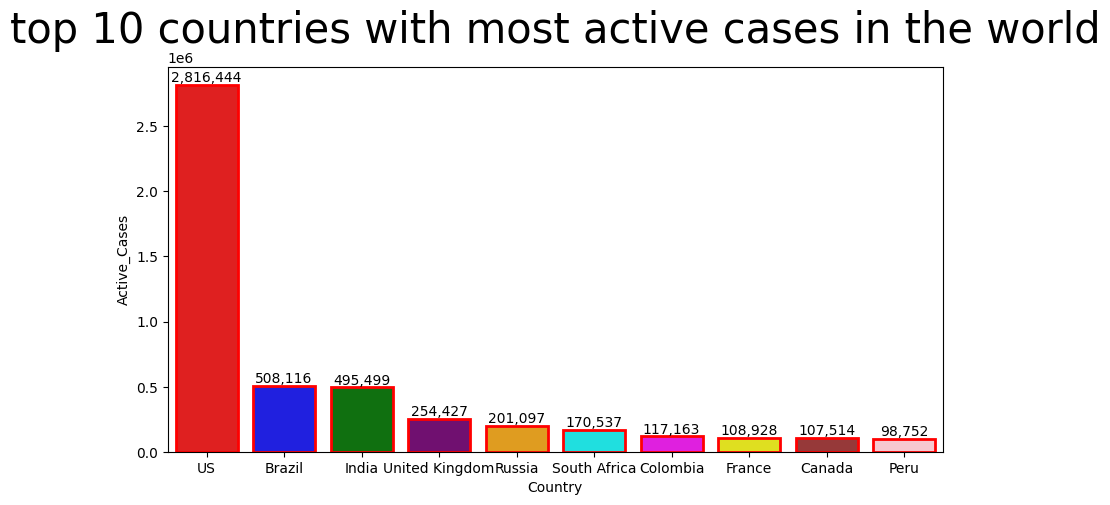

In [ ]:
top_10_active_cases = covid_df.groupby(by = 'Country/Region').max()[['Active_Cases']].sort_values(by = ['Active_Cases'],ascending = False).reset_index()
fig = plt.figure(figsize=(10,5))
plt.title("top 10 countries with most active cases in the world",size = 30)
ax = sns.barplot(data = top_10_active_cases.iloc[:10], y="Active_Cases", x="Country/Region", linewidth = 2, edgecolor = 'red', palette=['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'brown', 'pink'], hue='Country/Region', legend=False)
plt.xlabel("Country")
plt.ylabel("Active_Cases")

for index, row in top_10_active_cases.iloc[:10].iterrows():
    ax.text(index, row['Active_Cases'], f"{row['Active_Cases']:,}", color='black', ha="center", va='bottom')

plt.show()

# Top Country with highest deaths in the world

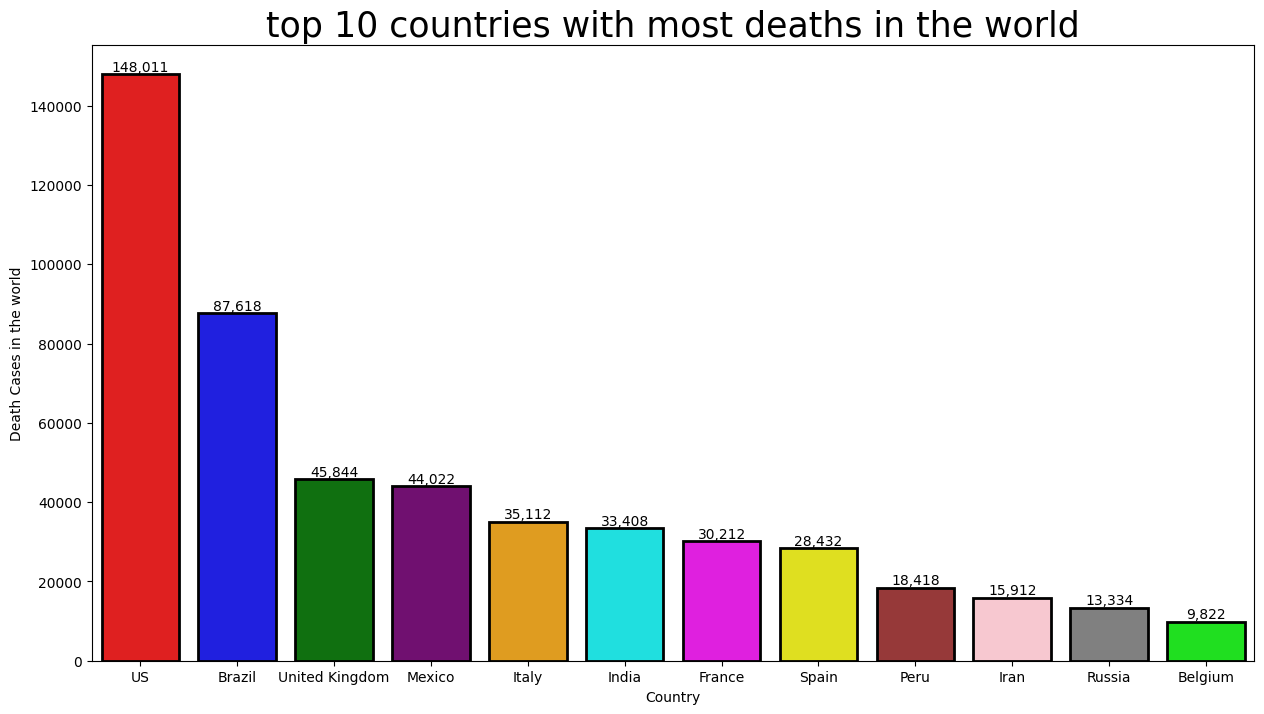

In [ ]:
top_10_deaths = covid_df.groupby(by = "Country/Region").max()[['Deaths']].sort_values(by = ['Deaths'],ascending = False).reset_index()
fig = plt.figure(figsize=(15,8))
plt.title("top 10 countries with most deaths in the world",size = 25)
ax = sns.barplot(data = top_10_deaths.iloc[:12],y = "Deaths", x="Country/Region",linewidth = 2,edgecolor = 'black',palette=['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'brown', 'pink', 'gray', 'lime'], hue='Country/Region', legend=False)
plt.xlabel("Country")
plt.ylabel("Death Cases in the world")

for index, row in top_10_deaths.iloc[:12].iterrows():
    ax.text(index, row['Deaths'], f"{row['Deaths']:,}", color='black', ha="center", va='bottom')
plt.show()

# Loading our second dataset

In [ ]:
day_df.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


# load information for second dataset

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    188 non-null    datetime64[ns]
 1   Confirmed               188 non-null    int64         
 2   Deaths                  188 non-null    int64         
 3   Recovered               188 non-null    int64         
 4   Active                  188 non-null    int64         
 5   New cases               188 non-null    int64         
 6   New deaths              188 non-null    int64         
 7   New recovered           188 non-null    int64         
 8   Deaths / 100 Cases      188 non-null    float64       
 9   Recovered / 100 Cases   188 non-null    float64       
 10  Deaths / 100 Recovered  188 non-null    float64       
 11  No. of countries        188 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory 

# Check whether dataset is null or not

In [ ]:
day_df.isnull().sum()

,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
New cases,0
New deaths,0
New recovered,0
Deaths / 100 Cases,0
Recovered / 100 Cases,0


# Death vs Recovered Comparision

In [ ]:
Death  = day_df["New deaths"].sum()
Recovered = day_df["New recovered"].sum()
px.pie(names=["New deaths","New recovered"],values=[Death, Recovered],title="Death and Recovered Comparision")

# Most Deaths Country in the world



In [ ]:
max_death = covid_df.groupby('Country/Region')['Deaths'].sum().to_frame('Total Deaths')
max_death = max_death.sort_values('Total Deaths',ascending= False)[:5]
max_death

,Total Deaths
Country/Region,
US,148011
Brazil,87618
United Kingdom,45844
Mexico,44022
Italy,35112


# Visualization for Most Deaths Country in the world

/tmp/ipython-input-2062310096.py:3: UserWarning:

The palette list has more values (12) than needed (5), which may not be intended.



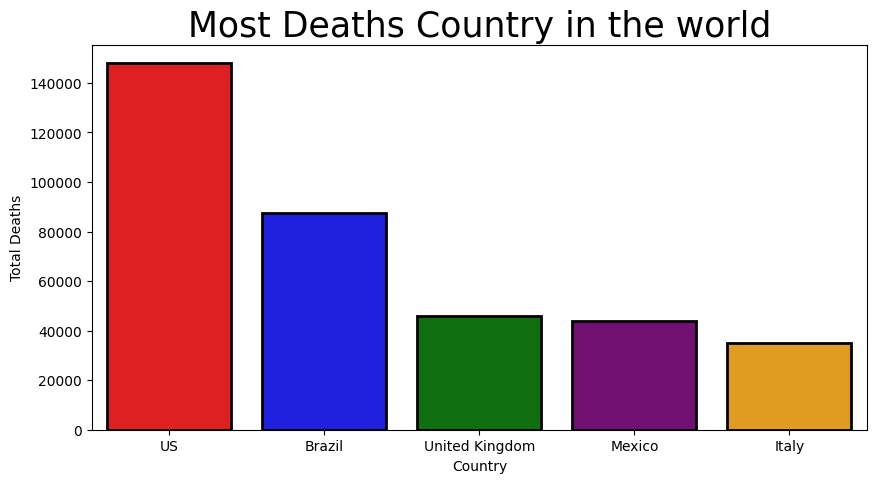

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.title("Most Deaths Country in the world",size = 25)
x = sns.barplot(data = max_death.iloc[:10],y=max_death['Total Deaths'], x= max_death.index,linewidth=2,edgecolor='black',palette=['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'brown', 'pink', 'gray', 'lime'], hue='Country/Region', legend=False)
plt.xlabel("Country")
plt.ylabel("Total Deaths")
plt.show()

# **Insights**:
1- The US is the most affected, but Brazil has a better recovery rate in comparison.

2- Qatar and Singapore performed the best, showing high recovery rates with low mortality.

3- The UK, Italy, and Belgium have the highest mortality rates, indicating significant pressure on their healthcare systems.

4- Time series analysis shows that the second wave began around June–July 2020.

5- WHO region-wise analysis reveals that the Americas and Europe are the most affected, while Africa may have under-reporting issues.

6- Correlation analysis shows a direct relationship between confirmed cases and deaths — higher cases lead to higher fatalities.

7- Active cases are highest in the US, India, and Brazil, making them ongoing COVID-19 hotspots.

8- The ratio of new cases to new deaths is higher in Europe and lower in Asia.

# **Recommendation:**
1- Countries with high mortality rates should increase ICU bed capacity and ventilator availability.

2- Best-practice models from high recovery rate countries like Qatar and Singapore can be adopted.

3- Expanding testing capacity is essential, especially in Africa and South Asia.

4- Time series data can help predict future waves and support early preventive planning.